#### This notebook is for testing purpose, it calles all the methods implemented in ``plonka_hoch_denoising'' file. Also, the theory part for convergence as per paper.
**Tested Methods**- 
1. pl_iter_method:  Calls the Plonka-Hoch Denoising Method.
    i). iterate: Calls the iteration function and calculates Naively. 'flag = False'
    ii). iterate_fast: Calls the iteration function for calculation faster way(vectorized).'flag = True'
4. block_finding: Calls and Finds the blocks in the image. It uses the method find_blocks_func.
5. mean_perBlock:Calls and Calculates the mean  of each block.
6. mean_filter: Calls and perform the mean filter as proposed by Plonka Hoch.
7. median_filter: Calls and perform the median filter as proposed by Plonka Hoch.
8. get_neighbors:Calls and Calculates the neighbors of a pixel in the image. It uses the method get_neighbors_func which is a helper function for get_neighbors 
        where we can pass the threshold_flag to get the neighbors of a pixel based on the threshold value
  

In [4]:
import numpy as np
from skimage.restoration import denoise_tv_chambolle
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from queue import Queue
import os
from plonka_hoch_denoising import PlonkaDenoiseMasterClass # Call the class and load the methods for testing

In [5]:
current_dir = os.getcwd()
img_path = current_dir+"\\example-1.png"
resize_shape = (50,50) # Resize the image to this shape
sigma = 20 # Noise level
theta =50 # Thresholding parameter
alpha = 0.10 #smoothing parameter
num_iter = 10
flag = True #True for fast implementation, False for slow implementation
plt.rcParams['axes.titlesize'] = 7 # Set the title size for the plots

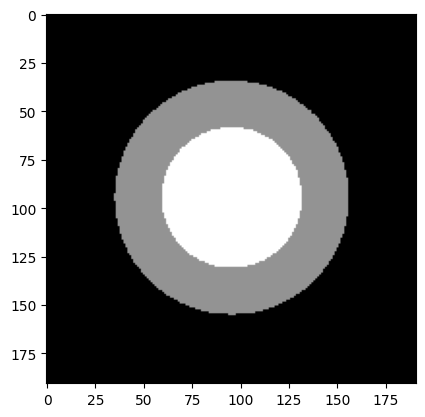

In [6]:
im = Image.open(img_path).convert('L')
u0 = np.array(im)
plt.imshow(u0, cmap='gray')
resized_im = cv2.resize(u0, (50, 50))

In [7]:
# Call the class and load the methods for testing: Flag=false for slow implementation
instance_2 = PlonkaDenoiseMasterClass(image_path=img_path, resize_shape=resize_shape, sigma=sigma, theta=theta, alpha=alpha, num_iter=num_iter, flag=False)

# Call the naive methods on the instance
naive, noise_added_im= instance_2.pl_iter_method()

# Print or visualize the results
print(naive)

Iteration 10 completed.
[[-2.30897004 -1.16636582  0.84473403 ... -3.3607408  -2.88004901
  -2.70146709]
 [-2.02592291 -1.01662898  0.67957309 ... -3.25383589 -2.69798525
  -2.43214097]
 [-1.09221642 -0.20193304  1.02866236 ... -2.9461203  -2.19048876
  -1.65566298]
 ...
 [-0.29466036  0.51355949  1.87579418 ... -2.94975925 -1.90337662
  -1.01660483]
 [-1.29521667 -0.21432605  1.65178458 ... -3.31584432 -2.51423558
  -1.92321455]
 [-2.02529693 -0.83803863  1.24176129 ... -3.39603126 -2.82389176
  -2.51568556]]


In [8]:
# Call the faster methods on the instance as flag = True
fast,_= instance_2.pl_iter_method(flag=True)

# Print or visualize the results
print(fast)

Iteration 10 completed.
[[-2.30897004 -1.16636582  0.84473403 ... -3.3607408  -2.88004901
  -2.70146709]
 [-2.02592291 -1.01662898  0.67957309 ... -3.25383589 -2.69798525
  -2.43214097]
 [-1.09221642 -0.20193304  1.02866236 ... -2.9461203  -2.19048876
  -1.65566298]
 ...
 [-0.29466036  0.51355949  1.87579418 ... -2.94975925 -1.90337662
  -1.01660483]
 [-1.29521667 -0.21432605  1.65178458 ... -3.31584432 -2.51423558
  -1.92321455]
 [-2.02529693 -0.83803863  1.24176129 ... -3.39603126 -2.82389176
  -2.51568556]]


In [9]:
# Check if the results are the same
print(np.allclose(fast, naive))

True


In [10]:
#Checking the results for the TV method
other_TV_method = denoise_tv_chambolle(u0, weight=10, channel_axis=False, max_num_iter=5)

Text(0.5, 1.0, 'Total variation denoising TV Chambolle')

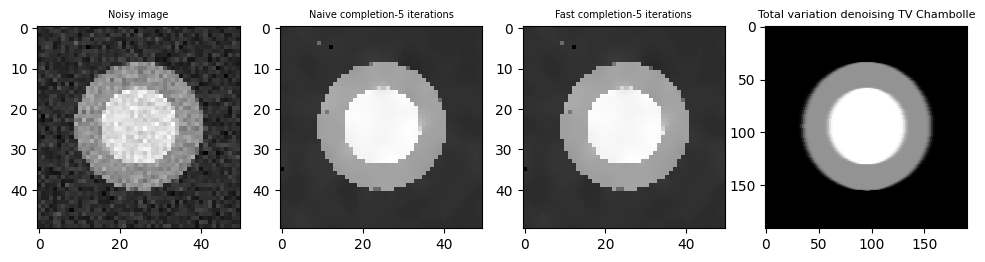

In [11]:
fig, ax = plt.subplots(1, 4,figsize=(12,12))
ax[0].imshow(noise_added_im, cmap='gray')
ax[1].imshow(naive, cmap='gray') 
ax[2].imshow(fast, cmap='gray')
ax[3].imshow(other_TV_method, cmap='gray')
ax[0].set_title('Noisy image')
ax[1].set_title('Naive completion-5 iterations')
ax[2].set_title('Fast completion-5 iterations')
ax[3].set_title('Total variation denoising TV Chambolle', fontsize=8)

# Theory Part(External)
- This part doesn't belong to the main implementation testing, just for theory. 
- Theory- [Page 5] - Paper: Convergence of an iterative nonlinear scheme for denoising of piecewise constant images by GERLIND PLONKA & JIANWEI MA

### Form page 5 from the paper 

Now consider the properties and convergence of the iteration scheme. For convenience, we restrict our considerations to the scheme $(2.2)$. All ideas can be simply transferred to more complex schemes.

We choose one index for pixel numbering of the digital image $u^k$. Put $N := N_1 \cdot N_2$ and $n = i + N_1j$, $i = 0, \ldots, N_1-1$, $j = 0, \ldots, N_2-1$, such that the pixel $n$ corresponds to $(i, j)$. Then the iteration scheme can be written in matrix-vector form as $u^{k+1} = A^k u^k$, where $u^k = (u^k_{0}, \ldots, u^k_{N-1})^T$ and where $A_k = (A^k_{n,p})^{N-1}_{n,p=0} \in \mathbb{R}^{N \times N}$ is a sparse matrix of the form

 $ A^k_{n,p} $ =
- $1 - \kappa_n \alpha  \text{ for } p = n $
- $\alpha \text{ for } p \in \{n-1, n+1, n-N_1, n+N_1\} \mod N \text{ and } |u^k_n−u^k_p|< \theta $,
- $\alpha/2 \text{ for } p \in \{n−1 +N_1, n+ 1 +N_1, n+ 1−N_1, n−1−N_1\} \mod N \text{ and } |u^k_n−u^k_p|< \theta $
- $0$ elsewhere 



where $\kappa_n$ (with $0 \leq \kappa_n \leq 6$) is chosen such that the sum of entries in the $ n $ th row of $A^k$ is $ 1 $.

Now we observe the following properties of the iteration matrix $A^k$(Most important properties for considering later calculation):

- The number of nonzero entries in each row (column) of $A^k$ is at most 9.
- For $\alpha \leq \frac{1}{6}$, all entries of $A^k$ are non-negative, i.e., $A^k \geq 0$.
- With $1 := (1, \ldots, 1)^T \in \mathbb{R}^N$, we have $A^k \cdot 1 = 1$.
- The iteration matrix $A_k$ is symmetric, i.e., $ A^k = (A^k)^T $.




In [12]:
#To prove the the properties as per the paper
def second_iter(u_k, alpha, theta):
    N1, N2 = u_k.shape
    N = N1 * N2
    u_k_flattened = u_k.flatten()
    
    u_kp1 = np.zeros_like(u_k_flattened)
    A = np.zeros((N, N))
    total =0;
    sum_arr= []
    for i in range(N):
        for j in range(N):
            
            n= i
            p= j

            neighbors = [(n-1, n-1+N1), (n+1, n+1+N1), (n-N1, n+1-N1), (n+N1, n-1-N1)]
            if (n!=p):
                for elmt in neighbors:
                    if ((p==(elmt[0]%N))) and (abs(u_k_flattened[n]- u_k_flattened[p])<theta) :
                        A[i,j] = alpha
                        # print(j, elmt[0]%N, abs(u_k_flattened[i]- u_k_flattened[j]))
                        # print("A",elmt[0]%N,abs(u_k_flattened[i]- u_k_flattened[j]) )

                    elif ((p==(elmt[1]%N))) and (abs(u_k_flattened[n]- u_k_flattened[p])<theta) :
                        A[i,j] = alpha/2
                        # print("B", elmt[1]%N,abs(u_k_flattened[i]- u_k_flattened[j]) , i, j)
        


       
        total= total + 1
        
        # sum_arr.append(sum(A[i]))
        # print(i,j)
        node_sum = sum(A[i,:])
        if ( node_sum != 1 ):
            k_n = node_sum/alpha
            A[i,i] = 1- k_n*alpha
        sum_arr.append(k_n)

        # print("total: ", total, k_n)
                    
                

        
    return A
C = second_iter(fast,alpha,theta)


In [13]:
#checking the sum of the rows example
print(sum(C[80,:]))

1.0


In [14]:
#Checking the conditions for the theorems
flag = True # set flag to True to check whether our all conditions are satisfied or not
if np.any(C < 0):
    print(" Has negative value.")
    flag = False
else:
    print("Ok!No negative value.")

if np.array_equal(C, C.T):
    print("Same as its transpose.")
else:
    print("Not Same")
    flag = False

for i in range(C.shape[0]):
    # counts the number of nonzero entries in row i
    nonzero_count = np.count_nonzero(C[i])

    # checks if the number of nonzero entries is more than 9
    if nonzero_count > 9:
        print(f"Row {i} has more than 9 nonzero elements.")
        flag = False
        break
else:
    print("No row has more than 9 nonzero elements.")

if flag:
    print("All conditions are satisfied.Hence our theorems are correct.")
else:
    print("All conditions are not satisfied.Hence our theorems are not correct.")

Ok!No negative value.
Same as its transpose.
No row has more than 9 nonzero elements.
All conditions are satisfied.Hence our theorems are correct.


# Second part

Testing methods-
1. **get_neighbour**(solves 8-neighborhood (also called 8-connectivity with periodicity)),
2. **find_blocks**(solves whether to create block by considering  each pixel neibours and the pixel value threshold ), 
3. **compute_mean** for computing mean for each blocks**
4. **mean_filter** - Testing whether it is working fine
5. **median_filter**-  Testing whether the function works

In [15]:
#Test case 1
img = np.array([[ 96, 181,  45],
 [204, 187, 159],
 [137, 217, 203]])
threshold_theta = 30
print("Image:", img)
Block = instance_2.find_blocks(img, threshold_theta)
print("Blocks coordinate:", len(Block),Block )

Image: [[ 96 181  45]
 [204 187 159]
 [137 217 203]]
Blocks coordinate: 3 [[(0, 0)], [(0, 1), (2, 2), (1, 0), (1, 1), (1, 2), (2, 1), (2, 0)], [(0, 2)]]


In [16]:
test_case_1 = instance_2.get_neighbors(0,1,img,0, threshold_flag=False)
print("Neighbors of (0,1):", test_case_1)

Neighbors of (0,1): [(2, 0), (2, 1), (2, 2), (0, 0), (0, 2), (1, 0), (1, 1), (1, 2)]


In [17]:
pixel_neibour = [img[x,y] for x, y in test_case_1]
print("Pixel values of neighbors:", pixel_neibour)

Pixel values of neighbors: [137, 217, 203, 96, 45, 204, 187, 159]


In [18]:
pixel_values_block = [[img[x,y] for x, y in sets] for sets in Block]
print("Pixel values of blocks:", pixel_values_block)

Pixel values of blocks: [[96], [181, 203, 204, 187, 159, 217, 137], [45]]


In [19]:
mean_block = instance_2.mean_perBlock(Block, img)
print("Mean of per block:", mean_block)

Mean of per block: [96.0, 184.0, 45.0]


In [20]:
#Upadted image after mean filter
updated_img = instance_2.mean_filter(img,mean_block,Block)

In [21]:
updated_img

array([[ 96, 184,  45],
       [184, 184, 184],
       [184, 184, 184]])

In [22]:
#Upadted image after median filter
median_updated = instance_2.median_filter(img,Block)

In [23]:
median_updated

array([[184, 181, 184],
       [204, 187, 159],
       [137, 217, 203]])

# Now we are okay to go for the rest of the implementation part

Text(0.5, 1.0, 'After doing fast computation-5 times')

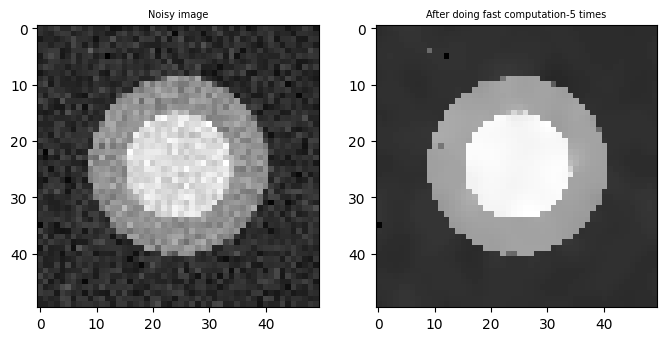

In [24]:
fig, ax = plt.subplots(1, 2,figsize=(8,8))
ax[0].imshow(noise_added_im,cmap='gray') # show noisy image
ax[1].imshow(fast,cmap='gray') # first iteration by fast computation
ax[0].set_title('Noisy image')
ax[1].set_title('After doing fast computation-5 times')

In [25]:
#Initialising the new parameters for the shrinkage 
new_theta =30

In [26]:
#finding the blocks
blocks = instance_2.find_blocks(fast, new_theta)
print("Blocks :", len(blocks) )

Blocks : 11


In [27]:
#computing the mean per block
compute_mean_per_Block = instance_2.mean_perBlock(blocks, fast)

In [28]:
#mean filter
mean_filter_im = instance_2.mean_filter(fast,compute_mean_per_Block,blocks)

Text(0.5, 1.0, 'After doing mean filter')

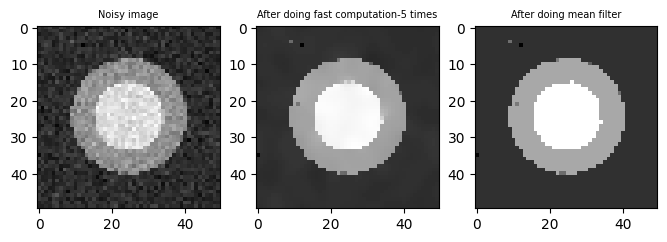

In [29]:
fig, ax = plt.subplots(1, 3,figsize=(8,8))
ax[0].imshow(noise_added_im,cmap='gray') # show noisy image
ax[1].imshow(fast,cmap='gray') # first iteration by fast computation
ax[2].imshow(mean_filter_im,cmap='gray') # after mean filter
ax[0].set_title('Noisy image')
ax[1].set_title('After doing fast computation-5 times')
ax[2].set_title('After doing mean filter')

In [30]:
#Median filter
median_updated = instance_2.median_filter(mean_filter_im,blocks)

Text(0.5, 1.0, 'After doing median filter')

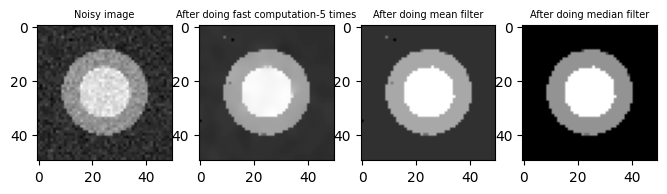

In [31]:
fig, ax = plt.subplots(1, 4,figsize=(8,8))
ax[0].imshow(noise_added_im,cmap='gray') # show noisy image
ax[1].imshow(fast,cmap='gray') # first iteration by fast computation
ax[2].imshow(mean_filter_im,cmap='gray') # after doing mean filter
ax[3].imshow(median_updated,cmap='gray') # after doing median filter
ax[0].set_title('Noisy image')
ax[1].set_title('After doing fast computation-5 times')
ax[2].set_title('After doing mean filter')
ax[3].set_title('After doing median filter')